# Basic satistical testing

## Hypothesis testing
The goal of data hypothesis is to determine if, for instance, the 2 different conditions that we have in an experiment have resulted in different impacts

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

In hypothesis testing we have 2 statements of interest:
- **alternative hypothesis**: our actual explanation
- **null hypothesis**: the explanation we have is nt sufficient

Our testing method is determine wether the null hypothesis is true or not.
If we find that there is a difference between groups, we can reject the null hypothesis and accept the alternative hypothesis

In [ ]:
df = pd.read_csv('grades.csv')
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [ ]:
print('There are {} rows and {} columns'.format(df.shape[0], df.shape[1]))

There are 2315 rows and 13 columns


Let's segment this population in 2 groups:
- **Early finishers**: Those who handed the assignment 1 before December 2015
- **Late finishers**: Rest

In [ ]:
early_finishers = df[pd.to_datetime(df['assignment1_submission']) < '2016']
early_finishers.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000
5,D09000A0-827B-C0FF-3433-BF8FF286E15B,71.647278,2015-12-28 04:35:32.836000000,64.052550,2016-01-03 21:05:38.392000000,64.752550,2016-01-07 08:55:43.692000000,57.467295,2016-01-11 00:45:28.706000000,57.467295,2016-01-11 00:54:13.579000000,57.467295,2016-01-20 19:54:46.166000000
8,C9D51293-BD58-F113-4167-A7C0BAFCB6E5,66.595568,2015-12-25 02:29:28.415000000,52.916454,2015-12-31 01:42:30.046000000,48.344809,2016-01-05 23:34:02.180000000,47.444809,2016-01-02 07:48:42.517000000,37.955847,2016-01-03 21:27:04.266000000,37.955847,2016-01-19 15:24:31.060000000


How to create the df `late_finishers`?
`df` and `early_finishers` share index values, so for `late_finishers` i just want everything in the `df` that is not in `early_finishers`

In [ ]:
late_finishers = df[~df.index.isin(early_finishers.index)]
late_finishers.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
6,3217BE3F-E4B0-C3B6-9F64-462456819CE4,87.498744,2016-03-05 11:05:25.408000000,69.998995,2016-03-09 07:29:52.405000000,55.999196,2016-03-16 22:31:24.316000000,50.399276,2016-03-18 07:19:26.032000000,45.359349,2016-03-19 10:35:41.869000000,45.359349,2016-03-23 14:02:00.987000000
7,F1CB5AA1-B3DE-5460-FAFF-BE951FD38B5F,80.576090,2016-01-24 18:24:25.619000000,72.518481,2016-01-27 13:37:12.943000000,65.266633,2016-01-30 14:34:36.581000000,65.266633,2016-02-03 22:08:49.002000000,65.266633,2016-02-16 14:22:23.664000000,65.266633,2016-02-18 08:35:04.796000000
9,E2C617C2-4654-622C-AB50-1550C4BE42A0,59.270882,2016-03-06 12:06:26.185000000,59.270882,2016-03-13 02:07:25.289000000,53.343794,2016-03-17 07:30:09.241000000,53.343794,2016-03-20 21:45:56.229000000,42.675035,2016-03-27 15:55:04.414000000,38.407532,2016-03-30 20:33:13.554000000


Let's use some of the statistical functions

In [ ]:
print('Early finishers :', early_finishers['assignment1_grade'].mean())
print('Late finishers :', late_finishers['assignment1_grade'].mean())                                  

Early finishers : 74.94728457024303
Late finishers : 74.0450648477065


Okay, these means are similar, but are they the same? What do we mean by similar? Here is where the **t-test** comes into play
- Alternative hypothesis: These are different
- Null hypothesis: These are the same

When doing hypothesis testing we need to choose **alpha** a threshold for how much of a chance we are willing to accept

> A t-test is a statistical test that is used to compare the means of two groups.

Scipy has some statistical tests. Let's use `ttest_ind()` which makes an independent t-test, meaning that the populations in the 2 groups are not related to one another.

The result of `ttest_ind()` are:
- t-statistic
- p-value. The probability that indicates the chance (between 0 and 1) of our null hypothesis being True

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(early_finishers['assignment1_grade'], late_finishers['assignment1_grade'])

Ttest_indResult(statistic=1.3223540853721596, pvalue=0.18618101101713855)

The probability of the null hypothesis (both populations are the same) is 0.18 and this is above our alpha of 0.05. This means we cannot reject the null hypothesis.
The null hypothesis was: The 2 populations are the same

The probability that early and late finishers get the same grade is 18%


Let's check the other assignment grades:

In [ ]:
print(ttest_ind(early_finishers['assignment2_grade'], late_finishers['assignment2_grade']))
print(ttest_ind(early_finishers['assignment3_grade'], late_finishers['assignment3_grade']))
print(ttest_ind(early_finishers['assignment4_grade'], late_finishers['assignment4_grade']))
print(ttest_ind(early_finishers['assignment5_grade'], late_finishers['assignment5_grade']))
print(ttest_ind(early_finishers['assignment6_grade'], late_finishers['assignment6_grade']))

Ttest_indResult(statistic=1.2514717608216366, pvalue=0.2108889627004424)
Ttest_indResult(statistic=1.6133726558705392, pvalue=0.10679998102227865)
Ttest_indResult(statistic=0.049671157386456125, pvalue=0.960388729789337)
Ttest_indResult(statistic=-0.05279315545404755, pvalue=0.9579012739746492)
Ttest_indResult(statistic=-0.11609743352612056, pvalue=0.9075854011989656)


p-values are not very well considered

# Other forms of structured data

Not everything is tabular data
- Network diagram

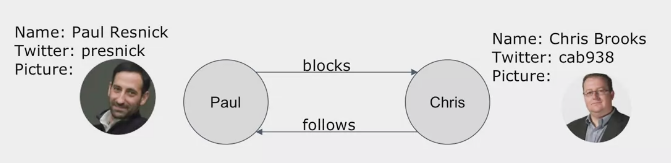

- Nodes and edges

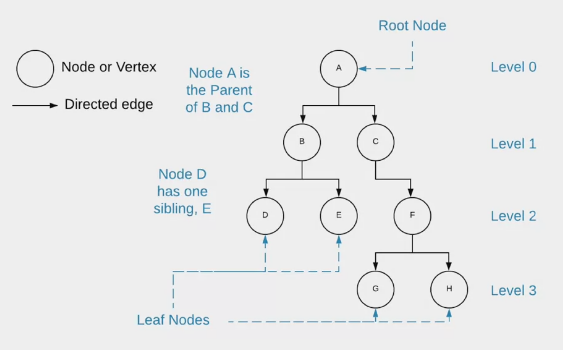